In [1]:
import numpy as np
import matplotlib.pyplot as plt

dx=0.05 #space increment
dt=0.05 #time increment
tmin=0.0 #initial time
tmax=2.0 #simulate until
xmin=-5.0 #left bound
xmax=5.0 #right bound...assume packet never reaches boundary
c=1.0 #speed of sound
rsq=(c*dt/dx)**2 #appears in finite diff sol

nx = int((xmax-xmin)/dx) + 1 #number of points on x grid
nt = int((tmax-tmin)/dt) + 2 #number of points on t, grid to cover initial timestep also
u = np.zeros((nt,nx)) #solution to WE

#set initial pulse shape
def init_fn(x):
    val = np.exp(-(x**2)/0.25)
    if val<.001:
        return 0.0
    else:
        return val #This is a practical consideration to avoid numerical inaccuracies or unnecessary computations 
    #for very small values that may not significantly contribute to the simulation.

for a in range(0,nx): # u (t,x)
    u[0,a]=init_fn(xmin+a*dx)
    u[1,a]=u[0,a]    #we need value at two points thts why

#simulate dynamics
for t in range(1,nt-1):
    for a in range(1,nx-1):
        u[t+1,a] = 2*(1-rsq)*u[t,a]-u[t-1,a]+rsq*(u[t,a-1]+u[t,a+1])


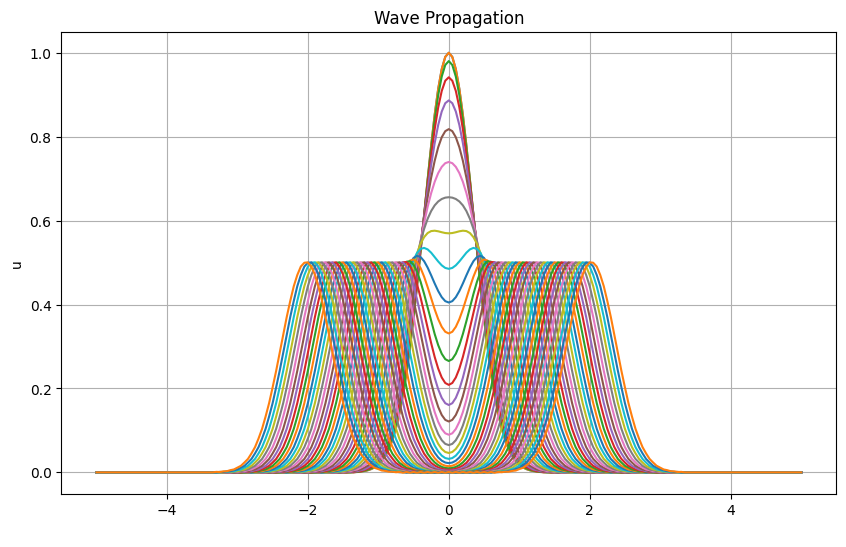

In [2]:

# Your wave equation solving code here...

# Plot the wave at different time steps
plt.figure(figsize=(10, 6))
for t in range(nt):
    plt.plot(np.linspace(xmin, xmax, nx), u[t, :], label=f"Time Step {t}")
plt.xlabel('x')
plt.ylabel('u')
plt.title('Wave Propagation')
# plt.legend()
plt.grid(True)
plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Your wave equation solving code here...

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define a function to update the plot for each frame of the animation
def update(frame):
    ax.clear() # clears the axis before plotting the new frame.
    ax.plot(np.linspace(xmin, xmax, nx), u[frame, :], label=f"Time Step {frame}") #plots the wave at the current time step (frame).
    ax.set_xlabel('x')
    ax.set_ylabel('u')
    ax.set_title('Wave Propagation')
    ax.legend()
    ax.grid(True)

# Create the animation
ani = FuncAnimation(fig, update, frames=range(nt), interval=100)

#This line creates the animation using FuncAnimation. It takes the following parameters:

# fig: The figure to animate.
# update: The function responsible for updating the plot for each frame.
# frames: An iterable containing the frames of the animation. 
# In this case, it's a range of time steps from 0 to nt-1.
# interval: The delay between frames in milliseconds.

# Display the animation
plt.close() #to prevent it from being displayed twice
from IPython.display import HTML
HTML(ani.to_jshtml())
